# Synthetic Text Generation

In this notebook, we demonstrate how to synthesize free text columns, and will furthermore explore its quality.

For further background see also [this blog post](https://mostly.ai/blog/synthetic-data-for-text-annotation/) on "How To Scale Up Your Text Annotation Initiatives with Synthetic Text".

## Synthesize Data via MOSTLY AI

1. Download `london.csv` by clicking [here](https://github.com/mostly-ai/mostly-tutorials/raw/dev/synthetic-text/london.csv), and pressing Ctrl+S to save the file locally.

2. Synthesize `london.csv` via [MOSTLY AI](https://mostly.ai/), and configure `host_name` and `title` as Encoding Type `Text` 

3. Once the job has finished, which might take up to 1 hour, download the generated synthetic data as CSV file to your computer.

4. Upload the generated synthetic data to this Notebook via executing the next cell.

In [1]:
# upload synthetic dataset
import pandas as pd
try:
    # check whether we are in Google colab
    from google.colab import files
    print("running in COLAB mode")
    repo = 'https://github.com/mostly-ai/mostly-tutorials/raw/dev/synthetic-text'
    import io
    uploaded = files.upload()
    syn = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
    print(f"uploaded synthetic data with {syn.shape[0]:,} records and {syn.shape[1]:,} attributes")
except:
    print("running in LOCAL mode")
    repo = '.'
    print("adapt `syn_file_path` to point to your generated synthetic data file")
    syn_file_path = './london-synthetic-representative.csv'
    syn = pd.read_csv(syn_file_path)
    print(f"read synthetic data with {syn.shape[0]:,} records and {syn.shape[1]:,} attributes")
    
tgt = pd.read_csv(f'{repo}/london.csv')
print(f"read original data with {tgt.shape[0]:,} records and {tgt.shape[1]:,} attributes")

running in LOCAL mode
adapt `syn_file_path` to point to your generated synthetic data file
read synthetic data with 71,938 records and 6 attributes
read original data with 71,938 records and 6 attributes


## Explore Synthetic Text

Show 10 randomly sampled synthetic records. Note, that you can execute the following cell multiple times, to see different samples.

In [2]:
syn.sample(n=10)

host_name                                              title  \
63445           Elya                    Spacious Room in Greater London   
2757             Mda  Luxury Georgian Apartment in Pimlico Marylebon...   
31262     Jacqueline              Blackheath4 bedroom house with garden   
57245  Constantinana               Bright house in the the heart of G10   
32643      Adedrehan         Creative hiderfront Mezzanine, large room.   
61947          Iwona               3 Bed 2Bath Apartment Soho - Zone 2!   
33524           Lara               Stunning room in the heart of London   
50758           Quad              CONARTELYt FLAND  2 Bedroom apartment   
53805        Jillabo       In Suburbings Luxury by River Thames & tubem   
3598        Michelle  Beautiful Interior Designedist Maisonette in C...   

                     property_type        room_type           neighbourhood  \
63445         Private room in home     Private room                  Bexley   
2757            Entire rental unit  Entire home/apt             Westminster   
31262             Entire townhouse  Entire home/apt          Waltham Forest   
57245  Private room in rental unit     Private room  Kensington and Chelsea   
32643  Private room in rental unit     Private room                  Merton   
61947                 Entire condo  Entire home/apt                  Camden   
33524  Private room in rental unit     Private room             Westminster   
50758           Entire rental unit  Entire home/apt                Hounslow   
53805                  Entire home  Entire home/apt                Hounslow   
3598                  Entire villa  Entire home/apt  Kensington and Chelsea   

       price  
63445     25  
2757     186  
31262    349  
57245     80  
32643     30  
61947    750  
33524     24  
50758     83  
53805    270  
3598     474

Compare this to 10 randomly sampled original records.

In [3]:
tgt.sample(n=10)

host_name                                              title  \
30652      GoUn  Spacious Ensuite Double Bedroom / Victorian House   
16766   Richard         Comfortable Double Bedroom in Notting Hill   
45031      Andy     1 Bed Apartment in Romford by Space Apartments   
47347       Sam       Spacious Two Bedroom Apartment in Wood Green   
27996     Jason          Fresh and modern flat in Chiswick London.   
70707    Waleed                   Lovely Flat in London-Southfield   
41535   Lennart             Luxury accommodation near Tower Bridge   
49209      Alex  Double room in Victorian house - Central Londo...   
38164      Lucy         Beautiful Clapham Flat close to the Common   
54921   Gabriel     Clean Double Room for rent in Cosy House House   

                     property_type        room_type           neighbourhood  \
30652         Private room in home     Private room  Hammersmith and Fulham   
16766  Private room in rental unit     Private room  Kensington and Chelsea   
45031                 Entire condo  Entire home/apt                Havering   
47347           Entire rental unit  Entire home/apt                Haringey   
27996           Entire rental unit  Entire home/apt                Hounslow   
70707           Entire rental unit  Entire home/apt              Wandsworth   
41535                 Entire condo  Entire home/apt           Tower Hamlets   
49209        Private room in condo     Private room               Islington   
38164           Entire rental unit  Entire home/apt                 Lambeth   
54921         Private room in home     Private room                 Croydon   

       price  
30652     34  
16766     44  
45031    109  
47347    161  
27996    182  
70707     85  
41535    100  
49209     99  
38164    130  
54921    300

### Inspect Character Set

You will note, that the character set of the synthetic data is shorter. This is due to the privacy mechanism within the MOSTLY AI platform, where very rare tokens are being removed, to prevent that their presence give away information on the existence of individual records.

In [4]:
print('## ORIGINAL ##\n', ''.join(sorted(list(set(tgt['title'].str.cat(sep=' '))))), '\n')
print('## SYNTHETIC ##\n', ''.join(sorted(list(set(syn['title'].str.cat(sep=' '))))), '\n')

## ORIGINAL ##
  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ £¦¬®°²´·ÁÉÜàáâãäåçèéìíóôöùüİıœАБВГДЛНРСУабвгдежзийклмнопрстухцшыьюяבדהוחילםמןנעפצקרשתდღ ​‍–—‘’“”•…⁂⁉⁎₂₄₆₈™↑→│▶◀●◑☀☃★☆☑☝☯☸☺☻☼♂♔♕♖♗♚♛♜♝♞♟♡♥♦♪♫♬⚜⚡✅✈✔✦✧✨✩✪✭✮✯✰✵✹✽✾✿❀❁❃❄❆❖❣❤❥❦➊➋➍➔➕➡⟮⟯⬆⭐⭑、。』【】〔〕きなのイキスバムルレ・ー一三世东两中临主之乡二五亚交亮人他付们价伦位住你佳便個倫值備僅入全公共其净出分利别剩务包区區十华单南卧卫厅厨双受可台合和品啦四回园国國在地场型堡塔墅多大天套奢女好威子字学宅安实客室宮家宽宿密寓寧専小尔层居屋市希带帶常干年床店廁建异式德心念思性惠感我或房手抢拎招排政敞敦整文斯新方日明星是晶暑暖最月有服朝期本机极林格档桥梅梯極楼欢歐比民水河治沿洁洗洲济浴海清温源溫滨独王理生用电畔留白的短碼私租立站筑精素紧絕絲级线经维罗置联肯至舍舒英華萨融西觉計設語让象豪贝质超跨車转辦迎近适通速適還邻配酒金鐵钟长間间限院陽雀露静靜非頭馨高齊간개고공교근기깔깨끔끗뉴늑는단담더던독드든락랏럭런렛룸리멋몰베보브블빛살서셔소숙실아안역욕의이인잘장존진처캠크통트파편플하한햇화️﹢！（），［］ｘ～￼𝗕𝗥𝗦𝗮𝗱𝗲𝗴𝗵𝗶𝗹𝗻𝗼𝗿𝘀𝘁𝘂𝘃𝘄𝘆𝟯🅿🇦🇧🇪🇫🇬🇮🇷🇸🇺🌃🌆🌇🌈🌞🌟🌠🌱🌲🌳🌴🌵🌸🌹🌺🌻🌿🍃🍒🎀🎬🎯🎾🏆🏒🏘🏙🏛🏟🏠🏡🏳🏴🏻🏼🐈🐱🐶👌👍👑👥💂💎💐💕💖💗💙💚💛💜💤💫📍📶🔝🖼😊😍😴🙆🚀🚂🚆🚉🚊🚌🚍🚗🚞🚨🚲🛀🛋🛌🛍🛏🤩🤴🥇🥰🧡🪴󠁢󠁥󠁧󠁮󠁿 

## SYNTHETIC ##
  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ £¦°²´·ÁÉÜàáåçèéìíóöùüİıœАВДСУавгдеийклнопртуюяיעდ​‍–—‘’“”•…⁂⁉₈↑│▶◑☀★☆☝☯☸☺☻☼♂♕♖♗♚♛♜♝♟♡♥♦♪♫♬⚡✈✔✦✧✨✩✪✮✯✰✵✹✿❀❁❃❄❆❖❣❤❦➊➍➔

### Inspect Character Frequency

In [5]:
title_char_freq = pd.merge(
    tgt['title'].str.split('').explode().value_counts(normalize=True).to_frame('tgt').reset_index(),
    syn['title'].str.split('').explode().value_counts(normalize=True).to_frame('syn').reset_index(),
    on='index', 
    how='outer'
).rename(columns={'index': 'char'}).round(5)
title_char_freq.head(10)

char      tgt      syn
0       0.13409  0.13375
1    o  0.07679  0.07608
2    e  0.07653  0.07714
3    n  0.05957  0.05908
4    t  0.05645  0.05664
5    a  0.05333  0.05299
6    r  0.05044  0.05041
7       0.04836  0.04815
8    i  0.04755  0.04762
9    l  0.03462  0.03490

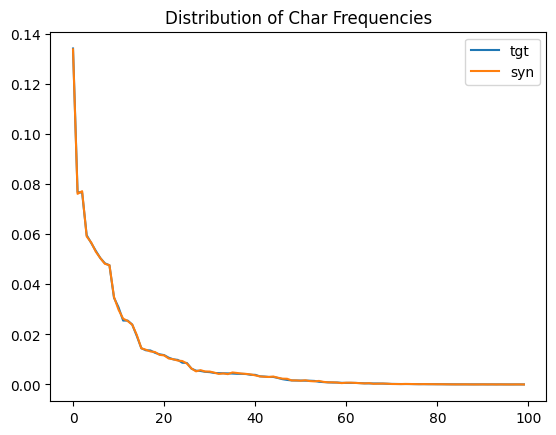

In [6]:
import matplotlib.pyplot as plt
ax = title_char_freq.head(100).plot.line()
plt.title('Distribution of Char Frequencies')
plt.show()

We can see that Character Frequencies are perfectly retained.

### Inspect Term Frequency

In [7]:
import re
def sanitize(s):
    s = str(s).lower()
    s = re.sub('[\\,\\.\\)\\(\\!\\"\\:\\/]', ' ', s)
    s = re.sub('[ ]+', ' ', s)
    return s

tgt['terms'] = tgt['title'].apply(lambda x: sanitize(x)).str.split(' ')
syn['terms'] = syn['title'].apply(lambda x: sanitize(x)).str.split(' ')
    
title_term_freq = pd.merge(
    tgt['terms'].explode().value_counts(normalize=True).to_frame('tgt').reset_index(),
    syn['terms'].explode().value_counts(normalize=True).to_frame('syn').reset_index(),
    on='index', 
    how='outer'
).rename(columns={'index': 'term'}).round(5)
display(title_term_freq.head(10))
display(title_term_freq.head(200).tail(10))

term      tgt      syn
0         in  0.05441  0.05255
1       flat  0.03362  0.03136
2       room  0.03209  0.03420
3     london  0.02844  0.02692
4    bedroom  0.02788  0.02373
5  apartment  0.02130  0.01980
6     double  0.02063  0.02108
7       with  0.01868  0.01849
8          2  0.01759  0.01717
9        bed  0.01642  0.01753

term      tgt      syn
190     twin  0.00070  0.00086
191      2br  0.00070  0.00084
192   unique  0.00069  0.00049
193     soho  0.00068  0.00070
194    canal  0.00068  0.00091
195    leafy  0.00067  0.00062
196     rent  0.00067  0.00076
197  cottage  0.00067  0.00073
198    excel  0.00067  0.00073
199     mews  0.00067  0.00071

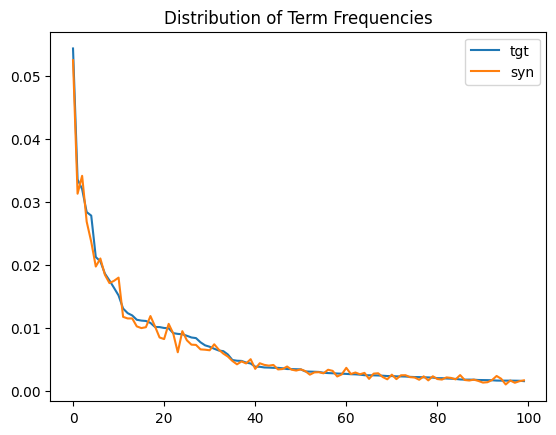

In [8]:
ax = title_term_freq.head(100).plot.line()
plt.title('Distribution of Term Frequencies')
plt.show()

We can see that Term Frequencies are perfectly retained.

### Inspect Term Co-occurrence

In [9]:
def calc_conditional_probability(term1, term2):
    tgt_beds = tgt['title'][tgt['title'].str.lower().str.contains(term1).fillna(False)]
    syn_beds = syn['title'][syn['title'].str.lower().str.contains(term1).fillna(False)]
    tgt_beds_double = tgt_beds.str.lower().str.contains(term2).mean()
    syn_beds_double = syn_beds.str.lower().str.contains(term2).mean()
    print(f"{tgt_beds_double:.0%} of actual Listings, that contain `{term1}`, also contain `{term2}`")
    print(f"{syn_beds_double:.0%} of synthetic Listings, that contain `{term1}`, also contain `{term2}`")
    print("")

calc_conditional_probability('bed', 'double')
calc_conditional_probability('bed', 'king')
calc_conditional_probability('heart', 'london')
calc_conditional_probability('london', 'heart')

14% of actual Listings, that contain `bed`, also contain `double`
13% of synthetic Listings, that contain `bed`, also contain `double`

7% of actual Listings, that contain `bed`, also contain `king`
6% of synthetic Listings, that contain `bed`, also contain `king`

28% of actual Listings, that contain `heart`, also contain `london`
26% of synthetic Listings, that contain `heart`, also contain `london`

4% of actual Listings, that contain `london`, also contain `heart`
4% of synthetic Listings, that contain `london`, also contain `heart`



We can see that Term Co-occurrences are perfectly retained.

### Inspect Privacy via Exact Matches

Let's perform a simplified check for privacy, by looking for exact matches between the synthetic and the original.

For that we first split the original data into two equally-sized sets, and measure the number of matches between those two sets.

In [10]:
n = int(tgt.shape[0]/2)
pd.merge(tgt[['title']][:n].drop_duplicates(), tgt[['title']][n:].drop_duplicates())

title
0                                     Cozy double room
1                                          Single room
2                                          Double room
3                                   Bright double room
4                     Double Room in Victorian Terrace
..                                                 ...
318    Euston Square Hotel, Superior Double Room (2DX)
319  Furnished Flat in Central London, Edgware Road...
320                                Double room to rent
321  Prime area, professional cleaning, high speed ...
322                                 Lovely Double Room

[323 rows x 1 columns]

Next, we take an equally-sized subset of the synthetic data, and again measure the number of matches between that set and the original data.

In [11]:
pd.merge(tgt[['title']][:n].drop_duplicates(), syn[['title']][:n].drop_duplicates())

title
0                       Cozy double room
1    Spacious Double Room in East London
2                            Single room
3                            Double room
4                     Bright double room
..                                   ...
231                  Home away from Home
232                 Bright and cosy room
233                                 Rent
234                   Lovely single room
235                      Double Bed room

[236 rows x 1 columns]

We can see that exact matches between original and synthetic data can occur. However, they occur only for the most commonly used descriptions, and they do not occur more often than they occur in the original data itself.

Thus, it's important to note, that matchinig values or matching complete records are by themselves not a sign of privacy leak. They are only an issue if they occur more frequently than we would expect based on the original dataset. Also note that removing those exact matches via post-processing would have a detrimental contrary effect. The absence of a value like "Lovely single room" in a sufficiently large synthetic text corpus would in this case actually give away the fact that this sentence was present in the original. See [[1](#refs)] respectively [[2](#refs)] for more background info on this aspect.

### Analyze Price vs. Text correlation

In [12]:
tgt_term_price = tgt[['terms', 'price']].explode(column='terms').groupby('terms')['price'].median()
syn_term_price = syn[['terms', 'price']].explode(column='terms').groupby('terms')['price'].median()
def print_term_price(term):
    print(f"Median Price of actual Listings, that contain `{term}`: ${tgt_term_price[term]:.0f}")
    print(f"Median Price of synthetic Listings, that contain `{term}`: ${syn_term_price[term]:.0f}")
    print("")

print_term_price("luxury")
print_term_price("stylish")
print_term_price("cozy")
print_term_price("small")

Median Price of actual Listings, that contain `luxury`: $180
Median Price of synthetic Listings, that contain `luxury`: $179

Median Price of actual Listings, that contain `stylish`: $134
Median Price of synthetic Listings, that contain `stylish`: $140

Median Price of actual Listings, that contain `cozy`: $70
Median Price of synthetic Listings, that contain `cozy`: $70

Median Price of actual Listings, that contain `small`: $55
Median Price of synthetic Listings, that contain `small`: $60



We can see that correlations between Term occurence and the price per night, are also perfectly retained.

## Conclusion

This tutorial demonstrated how synthetic text can be generated wihtin the context of an otherwise structured dataset. We analyzed the generated texts, and validated that characters and terms occur with the same frequency, while exact matches do not occur anymore likely than within the actual text itself.

This feature thus allows to retain valuable statistical insights, typically burried away in free text columns, that remain inaccessible due to their privacy sensitive nature.

## Further exercises

In addition to walking through the above instructions, we suggest..
* analyzing further correlations, also for `host_name`
* using a different generation mood, eg. conservative sampling
* using a different dataset, eg. the Austrian First Name [[3](#refs)]

## References<a class="anchor" name="refs"></a>

1. https://github.com/mostly-ai/public-demo-data/blob/dev/firstnames_at/firstnames_at.csv.gz
1. https://www.frontiersin.org/articles/10.3389/fdata.2021.679939/full
1. https://mostly.ai/blog/truly-anonymous-synthetic-data-legal-definitions-part-ii/